# The IS-LM-PC model

In [89]:
import numpy as np
import sympy as sm
from scipy import optimize
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

The IS-LM-PC model is a basic macroeconomic model which has replaced the AS-AD model in some newer macroeconomic textbooks. It describes the medium run by combining the IS-LM model with the Phillips curve, thus creating a relation between inflation, unemployment, the output gap, and interest rate policy. 

We define first the **variables**, **parameters** and **equations** of the IS-LM model:
* $Y$ is output (or income) 
* $C$ is consumption
* $c_0$ is the part of consumption that is independent of income
* $c_1$ is the marginal propensity to consume
* $T$ is taxes net of transfers
* $t_0$ is the part of taxes that is independent of income
* $t_1$ is the tax rate on income
* $I$ is investment
* $b_0$ is the part of investment that is independent of income and the interest rate
* $b_1$ is the income sensitivity of investment  
* $b_2$ is the interest rate sensitivity of investment
* $G$ is government spending
* $r$ is the real interest rate

$$
\begin{aligned}
Y=C+I+G\\
C=c_{0}+c_{1}*(Y-t_{0}-t_{1}Y)\\
T=t_{0}+t_{1}Y\\
I=b_{0}+b_{1}Y-b_{2}r\\
\end{aligned}
$$



The central bank sets the interest rate directly, such that the real interest rate equals $r=\bar{r}$. The LM curve in this model is thus simply:

$$
\begin{aligned}
LM: r=\bar{r}\\
\end{aligned}
$$

In the following we derive the IS curve

In [90]:
y = sm.symbols('Y')
c = sm.symbols('C')
i = sm.symbols('I')
g = sm.symbols('G')
t = sm.symbols('T')
i_n = sm.symbols('i')
r = sm.symbols('r')
c0 = sm.symbols('c_0')
c1 = sm.symbols('c_1')
t0 = sm.symbols('t_0')
t1 = sm.symbols('t_1')
b0 = sm.symbols('b_0')
b1 = sm.symbols('b_1')
b2 = sm.symbols('b_2')
r_bar = sm.symbols("rbar")

eqC = sm.Eq(c, (c0+c1*(y-t0-t1*y)))
eqT = sm.Eq(t, (t0+t1*y))
eqI = sm.Eq(i, (b0+b1*y-b2*r))

eq_t = t0+t1*y
eq_c = c0+c1*y-eq_t
eq_i = b0+b1*y-b2*r
eq_y = sm.Eq(y, (eq_c+eq_i+g))

c_func = sm.lambdify((c0,c1,t0,t1,y),sm.solve(eqC,c)[0])
t_func = sm.lambdify((t0,t1,y),sm.solve(eqT,t)[0])
i_func = sm.lambdify((b0,b1,b2,r,y),sm.solve(eqI,i)[0])

y_func = sm.lambdify((c0,c1,t0,t1,b0,b1,b2,r,g),sm.solve((eq_y), y)[0])
y_solve = sm.solve((eq_y), y)[0]

In [91]:
import sympy
from IPython.display import display, Markdown

display(Markdown('$IS: Y$ = {}'.format(sympy.latex(y_solve, mode='inline'))))

$IS: Y$ = $\frac{- G - b_{0} + b_{2} r - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}$

Combining the IS curve and the LM curve gives the equilibrium level of output.

In [92]:
y_equi = y_func(c0,c1,t0,t1,b0,b1,b2,r_bar,g)
display(Markdown('Equilibrium level of output = {}'.format(sympy.latex(y_equi, mode='inline'))))

Equilibrium level of output = $\frac{- G - b_{0} + b_{2} \bar{r} - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}$

We then insert values for the parameters (and G)

In [78]:
### Kan man definere en variabel el. lign så man fx kan skrive:
### values = x, y, z
### y_num = y_func(values)
# Evt noget ala. kører dog ikke i funktionerne......
# values = [100,0.8,100,0.4,100,0.1,10,r_bar,500]
# y_num1 = y_func(*values)
# y_num1

y_num = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)
display(Markdown('$Y$ = {}'.format(sympy.latex(y_num, mode='inline'))))

$Y$ = $1200.0 - 20.0 \bar{r}$

We plot this in a figure. We also plot the LM curve for $\bar{r}$ = 10. The intersection between the two curves describes the equilibrium.


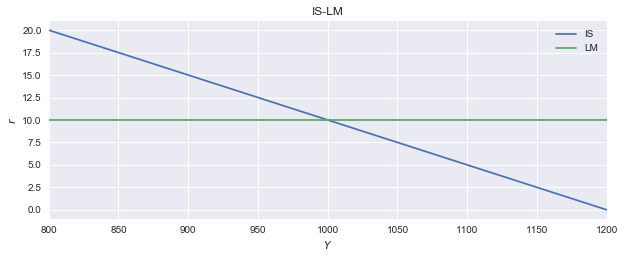

In [79]:
N = 100
 
r_vec = np.linspace(0,20,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*10 # interest rate = 10
 
for i,r_bar_plot in enumerate(r_vec):
    r_bar_plot = r_vec[i]
    y_vec[i] = y_func(100,0.8,100,0.4,100,0.1,10,r_bar_plot,500)

# creates the figures
plt.style.use("seaborn")

#plt.figure()
#plt.subplot(211)
#plt.plot(y_vec,r_vec,'r',y_vec,rbar_vec,'g')

#plt.subplot(212)
#plt.plot(y_vec,pi_vec,'b')

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec, label='IS')
fig_ISLM.plot(y_vec,rbar_vec, label='LM')
fig_ISLM.set_xlim([800,1200])
plt.legend()

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$r$') 
fig_ISLM.grid(True)


The Phillips curve describes the relationship between the unemployment rate and inflation. We assume the following relationship:
$$
\begin{aligned}
\pi-\pi^{e}=-\alpha*(u-u_{n})\\
\end{aligned}
$$

where
* $\pi$ is inflation
* $\pi^{e}$ is expected inflation
* $u$ is the unemployment rate
* $u_n$ is the natural rate of unemployment (or NAIRU)
* $\alpha$ is some parameter describing the sensitivity of wages to the unemplyment rate

*Jeg har ikke rettet pi^bar til pi^a i det her*

We further assume that inflation expectations are anchored, such that $\pi^{e}$ = $\bar{\pi}$. This corresponds to the *classic* or *original* Phillips curve. 

We assume a simple production function with labour as the only input, and one unit of labour producing one unit of output, such that output is equal to employment: 

$$
\begin{aligned}
Y=L*(1-u)\\
Y_n=L*(1-u_n)\\
\end{aligned}
$$

where $L$ is the size of the labour force, and $Y_n$ is the *potential* or *natural* level of output. 

This lets us describe the evolution of inflation as a function of the output gap:

$$
\begin{aligned}
\pi-\bar{\pi}=\frac{\alpha}{L}\left(Y-Y_{n}\right)
\end{aligned}
$$

We can thus plot the error in the inflation forecast as a funtion of $Y$, for given values of $\alpha$, the labour force, and potential output.

In [97]:
y_n = sm.symbols('Y_n')
inf = sm.symbols('pi')
inf_bar = sm.symbols('pibar')
inf_a = sm.symbols('(\pi-\pi^{a})') ### Ville gerne kunne skrive denne som pi - pibar, men virker ikke
alpha = sm.symbols('alpha')
l = sm.symbols('L')

# eq_PC = sm.Eq((inf-inf_bar), ((alpha/l)*(y-y_n)))
eq_PC = sm.Eq((inf_a), ((alpha/l)*(y-y_n)))

### Ville gerne kunne holde inf-inf_bar sammen i følgende (se ovenfor)
PC_func = sm.lambdify((inf_a,alpha,l,y_n),sm.solve((eq_PC), y)[0])
PC_solve = sm.solve((eq_PC), y)[0]
PC_solve

(\pi-\pi^{a})*L/alpha + Y_n

where $\pi_{error}$ = $\pi$ - $\bar{\pi}$

In [88]:
PC_num = PC_func(inf_err,0.5,1000,y_n)
PC_num

Y_n + 2000.0*\pi_{error}

Text(0, 0.5, '$\\pi-\\pi^e$')

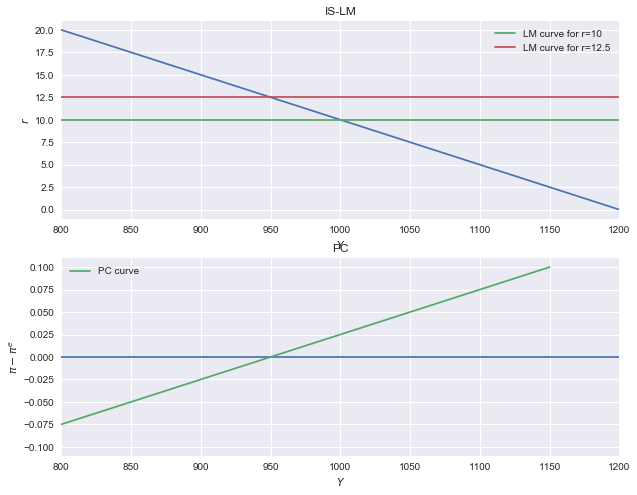

In [82]:
N = 100

###Ville være fedt at kunne få IS-LM diagrammet genereret ved en funktion. 

r_vec = np.linspace(0,20,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*10 # interest rate = 10
rbar_vec2 = np.ones(N)*12.5 # interest rate = 12.5

inf_vec = np.linspace(0.10,-0.10,N)
pi_vec = np.zeros(N) #line where the inflation expectation error is zero
PC_vec = np.empty(N)

for i,r_bar_plot in enumerate(r_vec):
    r_bar_plot = r_vec[i]
    y_vec[i] = y_func(100,0.8,100,0.4,100,0.1,10,r_bar_plot,500)

for i,inf_err_plot in enumerate(inf_vec):
    inf_err_plot = inf_vec[i]
    PC_vec[i] = PC_func(inf_err_plot,0.5,1000,950)

# creates the figures
plt.style.use("seaborn")

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec) # Plots the IS curve
fig_ISLM.plot(y_vec,rbar_vec,label='LM curve for r=10') # Plots the LM cuve
fig_ISLM.plot(y_vec,rbar_vec2,label='LM curve for r=12.5') 
fig_ISLM.set_xlim([800,1200])
plt.legend()

fig_PC = fig.add_subplot(2,1,2)
fig_PC.plot(y_vec,pi_vec)
fig_PC.plot(PC_vec, inf_vec, label='PC curve')
fig_PC.set_xlim([800,1200])
plt.legend()

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$r$') #OBS! OBS! OBS!
fig_ISLM.grid(True)

fig_PC.set_title('PC')
fig_PC.set_xlabel('$Y$')
fig_PC.set_ylabel('$\pi-\pi^e$')

### Ville være fint at kunne tilføje dots evt. bogstaver i ligevægtspunkterne. Evt. lodret streg gennem skæringspunkter

The PC curve has been drawn for $Y_n$ = 950. We see from the IS-LM diagram that when the real interest rate is 10 pct., actual output is 1000. This results in a positive output gap, leading to inflation being higher than expected inflation by 2.5 pct. 

The central bank can bring down the inflation rate by increasing the real interest rate. This is drawn as the red line in the IS-LM diagram. 

We assume that the central bank cares not only about inflation, but also about unemployment. Specifically, we assume that the central bank adjusts the real interest to maximize its utility, given the function
$$
\begin{aligned}
u=f\left(\pi-\pi^{*},\,u_{t}-u_{n}\right)
\end{aligned}
$$

where $\pi^{*}$ is the central banks target rate for inflation. (This rate is not necessarily equal to the anchored inflation expectation, $\bar{\pi}$.)

The central bank faces the constraints set by the relations between unemployment, inflation and the real interest rate by the IS-LM-PC model.

To make these contraints more clear, we express inflation and the difference between the actual and natural rates of unemployment as functions of the real interest rate.

We first find an expression for unemployment:

In [86]:
u = sm.symbols('u')
u_n = sm.symbols('u_n')

eq_u = sm.Eq(y-y_n, (l*(u-u_n)))
u_func = sm.lambdify((y,y_n,l,u_n),sm.solve((eq_u), u)[0])
u_solve = u_func(y_equi,y_n,l,u_n)
display(Markdown('$u$ = {}'.format(sympy.latex(u_solve, mode='inline'))))

$u$ = $\left(L u_{n} - Y_{n} + \frac{- G - b_{0} + b_{2} \bar{r} - c_{0} + t_{0}}{b_{1} + c_{1} - t_{1} - 1}\right) / L$

Inserting the value used previously gives:

In [87]:
u_num = u_func(y_num,950,1000,0.05)
display(Markdown('$u$ = {}'.format(sympy.latex(u_num, mode='inline'))))

$u$ = $0.3 - 0.02 \bar{r}$